# Feature Engineering

# Encoding

- Data: Tips
- Target: Tip
- Preprocess V1: 
    1. One Hot Encoding: Sex, Smoker, Time
    2. Ordinal Encoding: Day
    3. No Treatment: Size, Total_bill

- Preprocess V2:
    1. One Hot Encoding: Sex, Smoker
    2. Ordinal Encoding: Time, Day
    3. No Treatment: Size, Total_bill

- Random state 10, Data splitting 70:30 model Tree(max depth 3)

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer # mempermudah preprocessing, semua kolom digabungkan dengan ini

from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

## 1.1 Data

In [28]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 1.2 Skenario Preprocessing V1

- Preprocess V1: 
    1. One Hot Encoding: Sex, Smoker, Time
    2. Ordinal Encoding: Day
    3. No Treatment: Size, Total_bill

In [29]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [30]:
onehot_var = ['sex', 'smoker', 'time']
onehot = OneHotEncoder()

ordinal_var = ['day']
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = ordinal_var, mapping = ordinal_mapping)
ordinal_encoder

OrdinalEncoder(cols=['day'],
               mapping=[{'col': 'day',
                         'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                     'Thur': 1}}])

In [31]:
transformer1 = ColumnTransformer(
    [
    ('one hot encoder', onehot, onehot_var),
    ('ordinal encoder', ordinal_encoder, ordinal_var),
    ],
    remainder = 'passthrough')

## 1.3 Skenario Preprocessing V2

- Preprocess V2:
    1. One Hot Encoding: Sex, Smoker
    2. Ordinal Encoding: Time, Day
    3. No Treatment: Size, Total_bill

In [32]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [33]:
onehot_var = ['sex', 'smoker']
onehot = OneHotEncoder()

ordinal_var = ['day', 'time']
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}},
    {'col':'time',
    'mapping':{None:0, 'Dinner':1, 'Lunch':2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = ordinal_var, mapping = ordinal_mapping)
ordinal_encoder

OrdinalEncoder(cols=['day', 'time'],
               mapping=[{'col': 'day',
                         'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                     'Thur': 1}},
                        {'col': 'time',
                         'mapping': {None: 0, 'Dinner': 1, 'Lunch': 2}}])

In [34]:
transformer2 = ColumnTransformer(
    [
    ('one hot encoder', onehot, onehot_var),
    ('ordinal encoder', ordinal_encoder, ordinal_var),
    ],
    remainder = 'passthrough')

## 1.4 Data splitting

In [35]:
var = ['total_bill', 'size', 'smoker', 'sex', 'time', 'day']
x = tips[var]
y = tips['tip']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state = 10
)

## 1.5 Modeling Preprocessing V1

- Preprocess V1: 
    1. One Hot Encoding: Sex, Smoker, Time
    2. Ordinal Encoding: Day
    3. No Treatment: Size, Total_bill

In [37]:
x_train_prep1 = transformer1.fit_transform(x_train)
x_test_prep1 = transformer1.fit_transform(x_test)

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [38]:
pd.DataFrame(x_train_prep1)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,11.24,2.0
1,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.34,3.0
2,0.0,1.0,1.0,0.0,1.0,0.0,4.0,21.01,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,3.0,20.23,2.0
4,0.0,1.0,0.0,1.0,1.0,0.0,4.0,40.55,2.0
...,...,...,...,...,...,...,...,...,...
178,0.0,1.0,1.0,0.0,1.0,0.0,3.0,17.59,3.0
179,0.0,1.0,1.0,0.0,1.0,0.0,4.0,21.58,2.0
180,0.0,1.0,1.0,0.0,1.0,0.0,3.0,13.28,2.0
181,1.0,0.0,1.0,0.0,0.0,1.0,1.0,29.80,6.0


In [40]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train_prep1, y_train)

DecisionTreeRegressor(max_depth=3)

In [42]:
y_pred_test = model.predict(x_test_prep1)
mean_squared_error(y_test, y_pred_test)

0.8414314225960587

## 1.6 Modeling Preprocessing V2

- Preprocess V2:
    1. One Hot Encoding: Sex, Smoker
    2. Ordinal Encoding: Time, Day
    3. No Treatment: Size, Total_bill

In [43]:
x_train_prep2 = transformer2.fit_transform(x_train)
x_test_prep2 = transformer2.fit_transform(x_test)

C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\dheof\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [46]:
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(x_train_prep2, y_train)

DecisionTreeRegressor(max_depth=3)

In [47]:
y_pred_test2 = model2.predict(x_test_prep2)
mean_squared_error(y_test, y_pred_test2)

0.8414314225960589

## 1.7 Bentuk Pohon dan Nilai Importance (Prep 1)

In [48]:
model.feature_importances_

array([0.        , 0.        , 0.00232949, 0.10897832, 0.        ,
       0.        , 0.        , 0.8886922 , 0.        ])

In [50]:
transformer1.transformers_

[('one hot encoder', OneHotEncoder(), ['sex', 'smoker', 'time']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 1])]

In [52]:
transformer1.transformers_[0][1].get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Dinner', 'x2_Lunch'],
      dtype=object)

In [53]:
transformer1.transformers_[1][1].get_feature_names()

['day']

In [54]:
feature_names = list(transformer1.transformers_[0][1].get_feature_names()) + transformer1.transformers_[1][1].get_feature_names() + ['total_bill', 'size']

In [55]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
    }, index = feature_names)
importance_table

,imp
x0_Female,0.000000
x0_Male,0.000000
x1_No,0.002329
x1_Yes,0.108978
x2_Dinner,0.000000
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.000000


<AxesSubplot:>

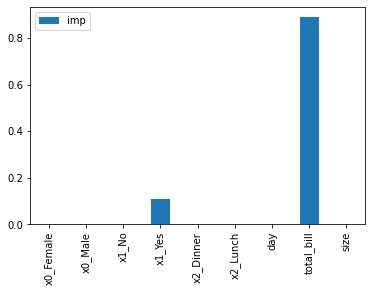

In [56]:
importance_table.plot(kind = 'bar')

[Text(418.5, 475.65000000000003, 'total_bill <= 24.57\nmse = 1.949\nsamples = 183\nvalue = 2.99'),
 Text(209.25, 339.75, 'total_bill <= 16.28\nmse = 0.845\nsamples = 138\nvalue = 2.562'),
 Text(104.625, 203.85000000000002, 'total_bill <= 13.145\nmse = 0.582\nsamples = 73\nvalue = 2.157'),
 Text(52.3125, 67.94999999999999, 'mse = 0.608\nsamples = 41\nvalue = 1.905'),
 Text(156.9375, 67.94999999999999, 'mse = 0.363\nsamples = 32\nvalue = 2.479'),
 Text(313.875, 203.85000000000002, 'x1_Yes <= 0.5\nmse = 0.747\nsamples = 65\nvalue = 3.018'),
 Text(261.5625, 67.94999999999999, 'mse = 0.471\nsamples = 49\nvalue = 2.883'),
 Text(366.1875, 67.94999999999999, 'mse = 1.365\nsamples = 16\nvalue = 3.431'),
 Text(627.75, 339.75, 'total_bill <= 48.25\nmse = 3.054\nsamples = 45\nvalue = 4.302'),
 Text(523.125, 203.85000000000002, 'x1_Yes <= 0.5\nmse = 1.869\nsamples = 43\nvalue = 4.061'),
 Text(470.8125, 67.94999999999999, 'mse = 1.627\nsamples = 25\nvalue = 4.636'),
 Text(575.4375, 67.94999999999999

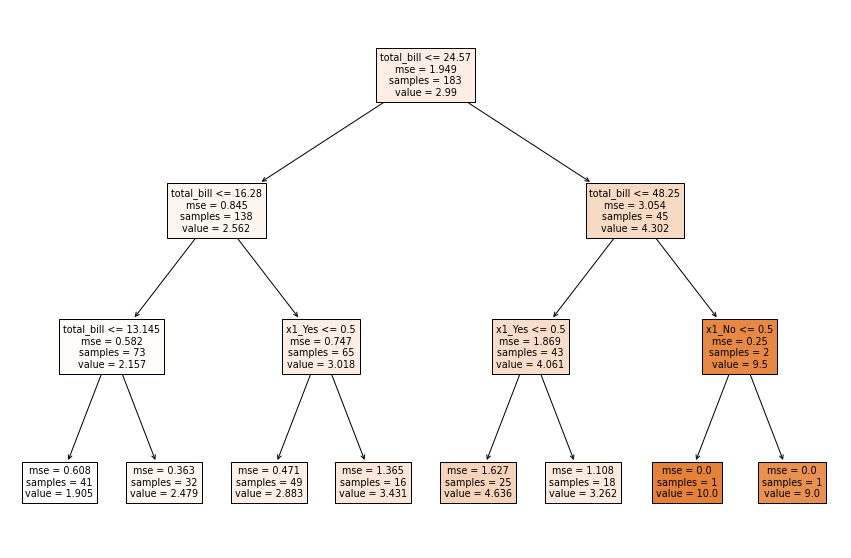

In [57]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names = feature_names, filled = True)